# Input and Output in a Google Colab environment.

## Upload a file "Armand.csv" by the right-click of the mouse on the top folder (with no name displayed but with "..") just below the "Files" left-menu panel in Google Colab.

Click "Upload" and then you can select the file on your local computer to upload it to your Google Colab environment.

107.7 GB size of the Disk is allocated to your session, with 27.4 GB is pre-allocated to something else. Therefore, you can upload a file of up to about 80 GB.

## Input: Read a CSV file.

In [5]:
import pandas as pd

df = pd.read_csv('Armand.csv')
df

,Restaurant,Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


## Click "View recommended plots" right to "Next steps:".

You will see many interesting plots generated.

If you want to see the code that actually generates a particular plot, then you can simply click the plot of your interest and then a new window will be popped out and display the code below the heading "Previous cell output is requesting a new notebook cell."

Click the "Add cell" button at the bottom of the popped window and the code will be copied and pasted to the newly added code cell in your notebook file.

<Axes: title={'center': 'Population'}, ylabel='Frequency'>

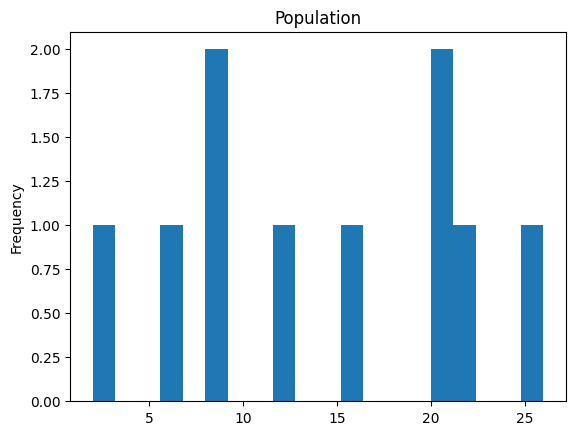

In [6]:
from matplotlib import pyplot as plt
df['Population'].plot(kind='hist', bins=20, title='Population')
# plt.gca().spines[['top', 'right',]].set_visible(False)

Suppose that we want to display histograms of "Population" and "Sales" columns by using the same code above, by simply specify a list of these two column names `['Population', 'Sales']` rather than just one column name `'Population'`.

<Axes: ylabel='Frequency'>

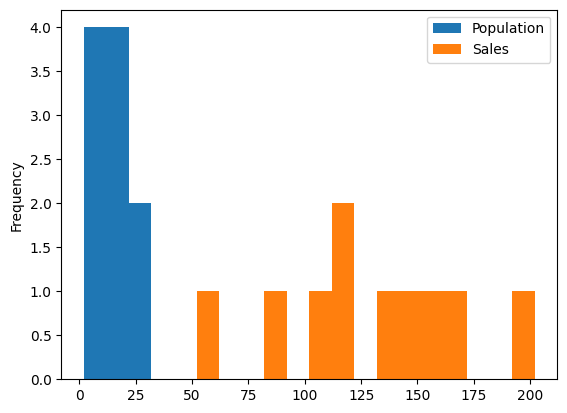

In [7]:
from matplotlib import pyplot as plt
df[ ['Population', 'Sales']].plot(kind='hist', bins=20)

The results are not so much satisfying, because we want to display a histogram for each of the two variables 'Population' and 'Sales' separately in two subplots in one plot.

Therefore, we use again Google's generative AI to achieve this goal. We can simply write what we want: "I have a pandas.DataFrame object, df. I want to plot histograms of df[ ['Population', 'Sales']] separately in one panel."

And we click "Generate" button to let Google's generative AI suggest a code.

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

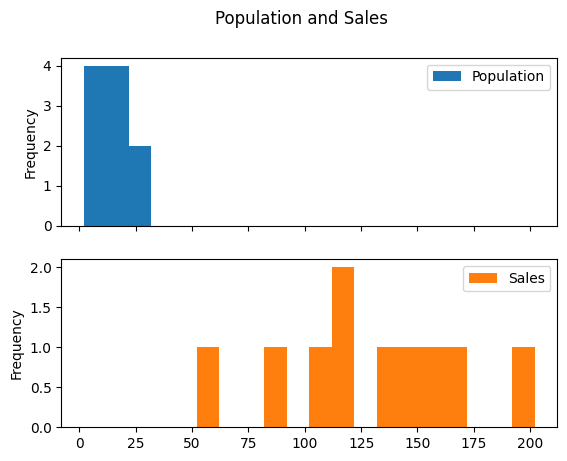

In [8]:
# prompt: I have a pandas.DataFrame object, df. I want to plot histograms of df[ ['Population', 'Sales']] separately in one panel.

import matplotlib.pyplot as plt
df[['Population', 'Sales']].plot(kind='hist', bins=20, title='Population and Sales', subplots=True)
## plt.gca().spines[['top', 'right',]].set_visible(False)


In the code returned by Google's generative AI, we can see that `subplots=True` option inside the `plot()` method of the dataframe `df` achieves what we wanted: display a histogram for each of the two variables 'Population' and 'Sales' separately in two subplots in one plot.

## Transformation

Suppose that we want to transform a wide-table format dataframe object to a long-table format one.

- A wide-table format dataframe: there are many columns corresponding to different variables.

- A long-table format dataframe: there are two columns, where one column contains the names of different variables and another column the values of those variables.

For example, suppose that we want to change the format of `df` to a long-table format of `(variable, value)`, and save the results as `df2`. In our example, the column `'Restaurant'` has a unique IDs of each row, and the remaining two columns 'Population' and 'Sales' correspond to different variables. We specify this fact by using `id_vars='Restaurant'` option and `value_vars=('Population','Sales')` option. Note that multiple column names should be provided as a tuple (i.e., inside paranthesis) rather than as a list (i.e., inside a bracket).


In [9]:
df2 = df.melt(id_vars='Restaurant', value_vars=('Population','Sales'))
df2


,Restaurant,variable,value
0,1,Population,2
1,2,Population,6
2,3,Population,8
3,4,Population,8
4,5,Population,12
5,6,Population,16
6,7,Population,20
7,8,Population,20
8,9,Population,22
9,10,Population,26


Save the processed results to local files.

We save the results as a CSV file, with `index=False` option indicating that we do not include the index of `df2` into the CSV file.

We also save the results as a parquet file, which is more efficient way to write and read a file.

In [10]:
df2.to_csv('Armand_melt.csv', index=False)
df2.to_parquet('Armand_melt.parquet')


ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

## Input: Read A File in a Subfolder.

Suppose that we want to read files from "sample_data" subfolder of the current folder of Colab environment. First, we need to know what files are available in such a folder.

We can use "Generate" button below to let the Google's generative AI procude the code for our desired task.

For instance, I type as: "read files from "sample_data" subfolder of the current folder of Colab environment."

In [ ]:
# prompt: read files from "sample_data" subfolder of the current folder of Colab environment.

import os

# Get the current working directory.
current_dir = os.getcwd()

# Construct the path to the "sample_data" subfolder.
sample_data_dir = os.path.join(current_dir, "sample_data")

# List all files in the "sample_data" subfolder.
files = os.listdir(sample_data_dir)

# Print the list of files.
for file in files:
    print(file)


anscombe.json
README.md
california_housing_train.csv
california_housing_test.csv
mnist_train_small.csv
mnist_test.csv


In [ ]:
import os

# Get the current working directory.
current_dir = os.getcwd()

# Construct the path to the "sample_data" subfolder.
sample_data_dir = os.path.join(current_dir, "sample_data")


We want to read a specific file e.g., "california_housing_train.csv" file, in "sample_data" subfolder of the current folder of Colab environment.

We can use  Google's generative AI to ask how to do this task. For instance, I write: "read a CSV file named "california_housing_train.csv" from "sample_data" subfolder of the current folder of Colab environment."

In [ ]:
# prompt: read a CSV file named "california_housing_train.csv" from "sample_data" subfolder of the current folder of Colab environment.

import pandas as pd
import os

# Get the current working directory.
current_dir = os.getcwd()

# Construct the path to the "sample_data" subfolder.
sample_data_dir = os.path.join(current_dir, "sample_data")

# Construct the path to the "california_housing_train.csv" file.
file_path = os.path.join(sample_data_dir, "california_housing_train.csv")

# Read the CSV file into a Pandas DataFrame.
df3 = pd.read_csv(file_path)

# Print the DataFrame.
df3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
